### CAR PRICE PREDICTION WITH MACHINE LEARNING

#### Step-1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Step-2: Load the dataset

In [2]:
data_path = "C:\\Users\\srira\\Downloads\\Optifyx Technology Internship\\car data.csv"
df = pd.read_csv(data_path)

#### Step-3: Data Exploration (EDA)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

#### Step 4: Data Pre-processing

In [9]:
df['Car_Age'] = 2024 - df['Year']
df = df.drop(['Car_Name', 'Year'], axis=1)
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Splitting Features and Target Variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 5: Data Visualization

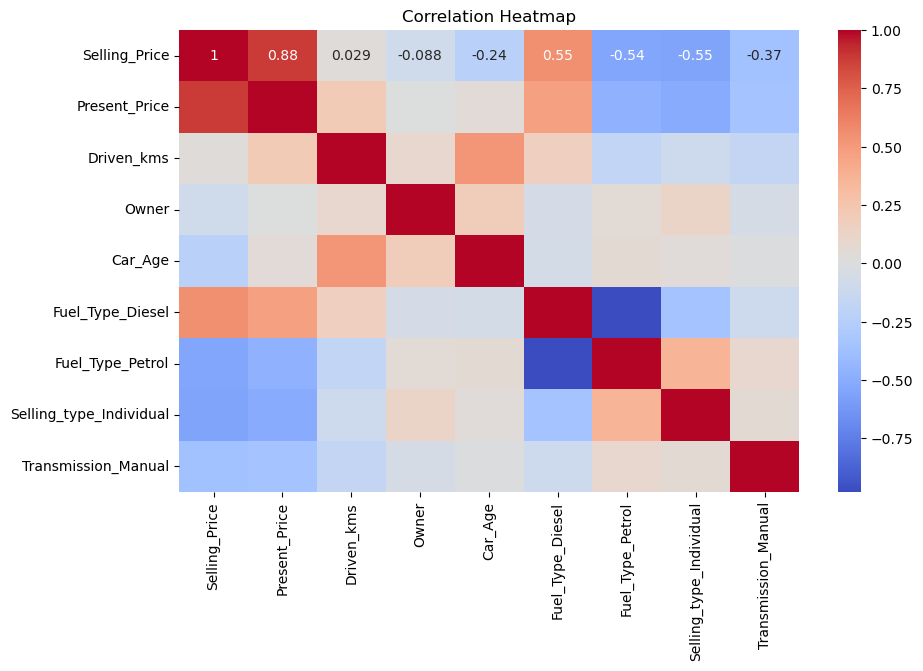

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

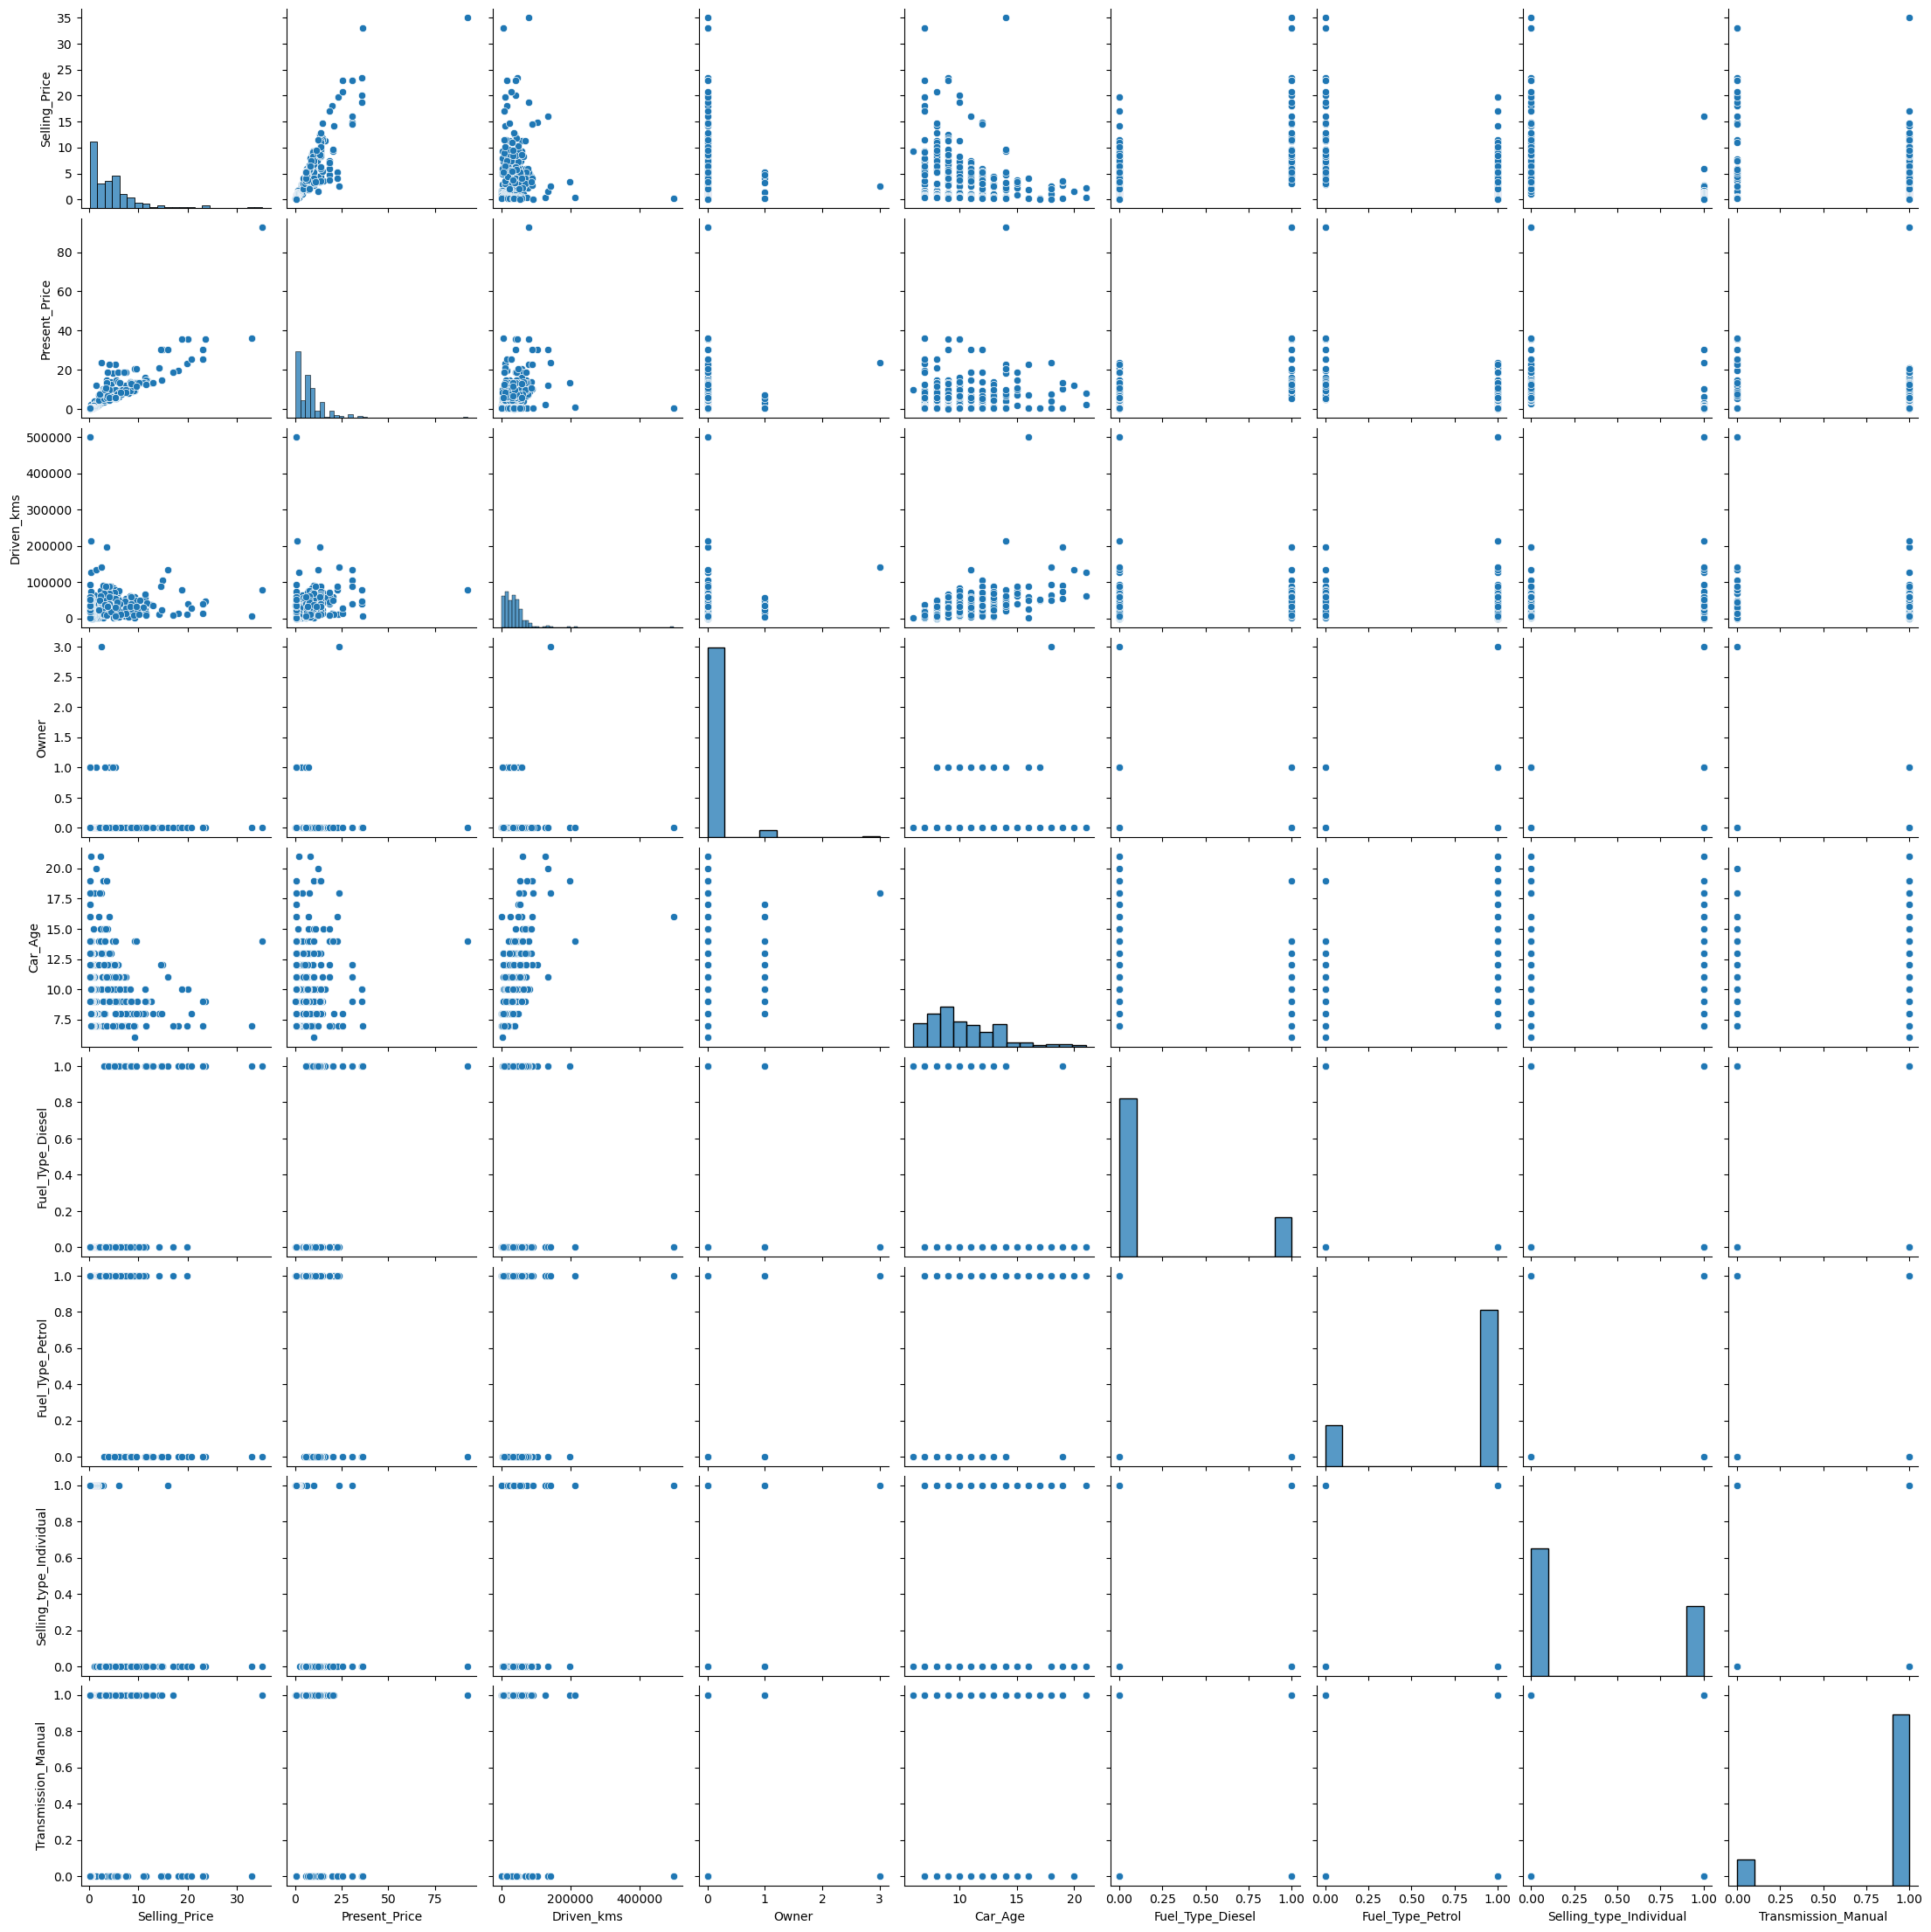

In [12]:
# Pair Plot
sns.pairplot(df)
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


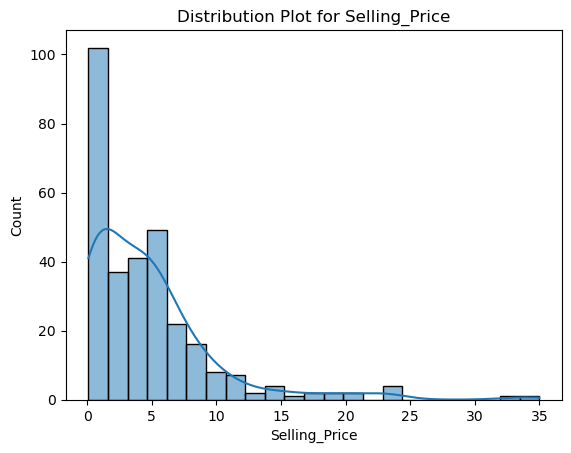

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


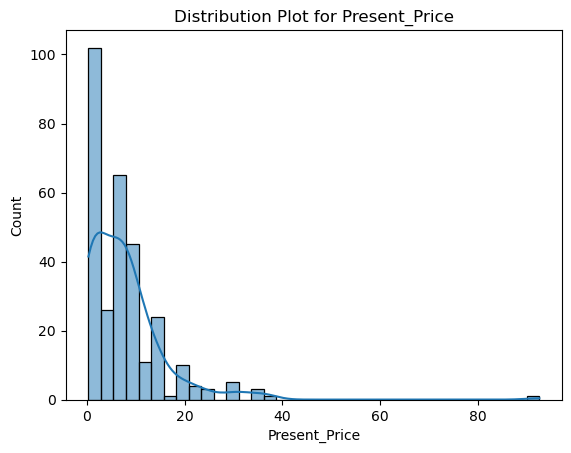

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


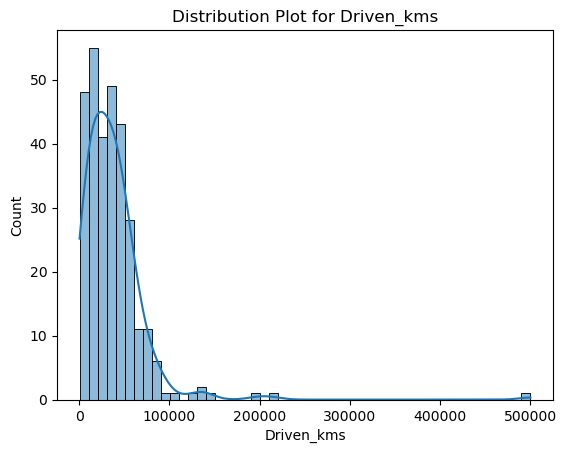

In [13]:
# Distribution Plots
for column in ['Selling_Price', 'Present_Price', 'Driven_kms']:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution Plot for {column}")
    plt.show()

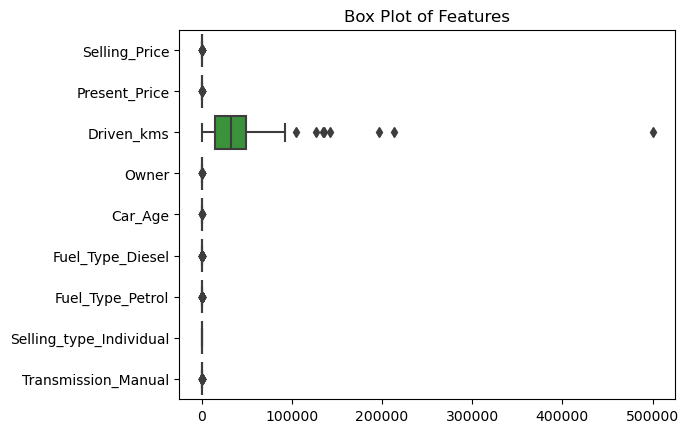

In [14]:
# Box Plots
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of Features")
plt.show()

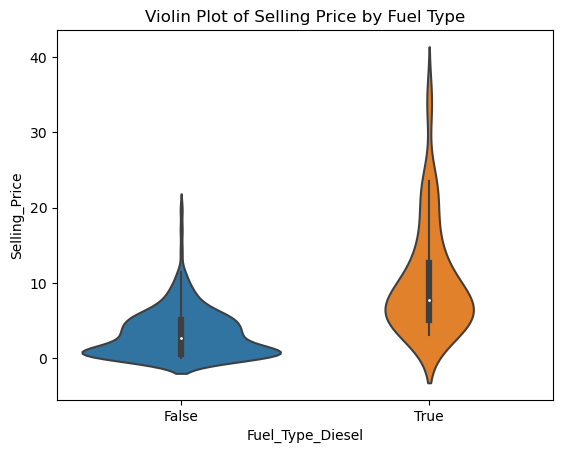

In [15]:
# Violin Plots
sns.violinplot(x='Fuel_Type_Diesel', y='Selling_Price', data=df)
plt.title("Violin Plot of Selling Price by Fuel Type")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size

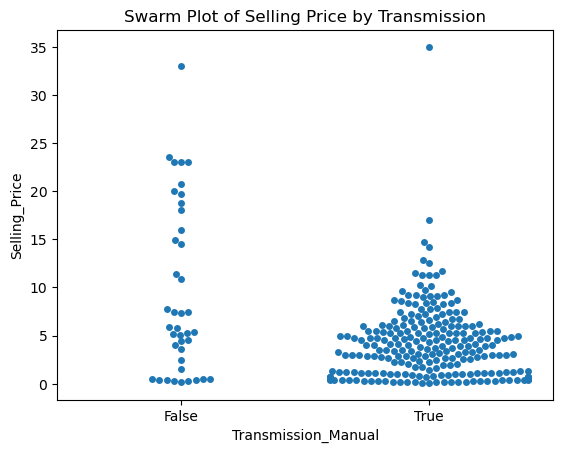

In [16]:
# Swarm Plots
sns.swarmplot(x='Transmission_Manual', y='Selling_Price', data=df)
plt.title("Swarm Plot of Selling Price by Transmission")
plt.show()

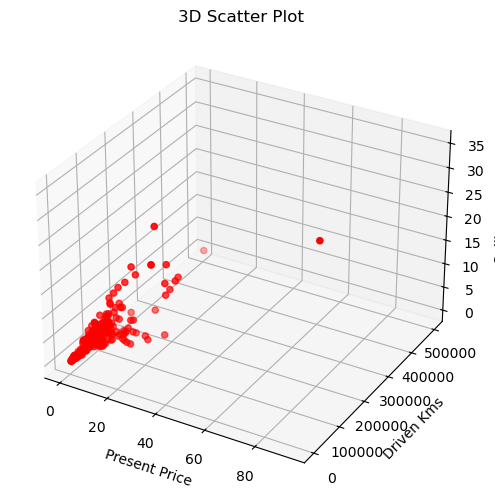

In [17]:
# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Present_Price'], df['Driven_kms'], df['Selling_Price'], c='r', marker='o')
ax.set_xlabel('Present Price')
ax.set_ylabel('Driven Kms')
ax.set_zlabel('Selling Price')
plt.title("3D Scatter Plot")
plt.show()

#### Step 6: Define the Models

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

#### Step 7: Train the Models

In [20]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

#### Step 8: Evaluate the Models

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
model_results[name] = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R-squared": r2,
    "Adjusted R-squared": adj_r2
}

In [22]:
# Display Evaluation Results
for name, metrics in model_results.items():
    print(f"{name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("\n")

K-Nearest Neighbors Evaluation Metrics:
  MAE: 3.419803278688524
  MSE: 23.573333770491804
  RMSE: 4.855237766628099
  R-squared: -0.023344285000794995
  Adjusted R-squared: -0.18078186730860968


